<h2> Лабораторная раборта №3. </h2>
<h3> Вариант 24. Хлебко Никита (БПМ 174). </h3>

<h3> №1.1.24 </h3> <br>
Дан ряд $\sum_{n=0}^{\infty} a_n$.Найти сумму ряда аналитически. Вычислить значения частичных сумм ряда $S_N = \sum_{n=0}^{N} a_n$ и найти величину погрешности при значениях $N = 10, 10^2, 10^3, 10^4, 10^5$. <br>
<h4> Решение аналитическое: </h4> <br>
$b_n = \frac{1}{n^2 + 9n + 20} = \frac{1}{n+4} - \frac{1}{n+5} $ <br><br>
$\sum_{n=0}^\infty b_n = \sum_{n=0}^\infty \frac{1}{n+4} - \frac{1}{n+5} = \frac{1}{4}$ <br><br>
$ S = \sum_{n=0}^{\infty} a_n = \frac{1}{4} * 96 = 24$



In [155]:
from sympy import *
import matplotlib.pyplot as plt
import warnings
import itertools
warnings.filterwarnings('ignore')

In [156]:
def get_sum(N):
    sum = 0.0
    for n in range (int(N+1)):
        sum+= 96/(n*n + 9*n + 20)
    return sum
def d(N):
    return abs(24 - get_sum(N))

In [157]:
i = 0
for N in [int(1e1), int(1e2), int(1e3), int(1e4), int(1e5)]:
    i+=1
    print("S({:d}) = {:f} \t d = {:f} \t M = {:d}".format(N, get_sum(N), d(N), i))

S(10) = 17.600000 	 d = 6.400000 	 M = 1
S(100) = 23.085714 	 d = 0.914286 	 M = 2
S(1000) = 23.904478 	 d = 0.095522 	 M = 3
S(10000) = 23.990405 	 d = 0.009595 	 M = 4
S(100000) = 23.999040 	 d = 0.000960 	 M = 5


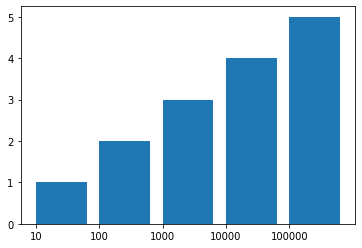

In [158]:
mx = [1, 2, 3, 4, 5]
xm = range(len(mx))
ax = plt.gca()
ax.bar(xm, mx, align='edge')
ax.set_xticks(xm)
ax.set_xticklabels(('10', '100', '1000', '10000', '100000'))
plt.show()

Легко заметить, что увеличение количества членов ряда увеличивает количество верных цифр на 1

<h3> №1.8 </h3> <br>
Составить программу, моделирующую вычисления на ЭВМ с ограниченной разрядностью $m$. Решить $задачу$ $1.1$ для случая $N =10000$, <br>используя эту программу. Составить график зависимости
погрешности от количества разрядов $m=4,5,…,8$.

In [159]:
def copy_get_sum(N, m):
    sum = 0.0
    for n in range (int(N+1)):
        sum+= round(96/(n*n + 9*n + 20), m)
    return round(sum, m)
def copy_d(N, m):
    return round(abs(24 - copy_get_sum(N, m)), m)

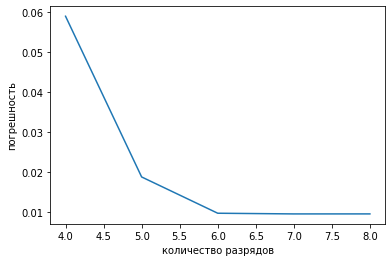

In [160]:
more_d = []
N = 10000
m = [4, 5, 6, 7, 8]
for M in m:
    more_d.append(copy_d(N, M))
plt.plot(m, more_d)
plt.xlabel("количество разрядов")
plt.ylabel("погрешность")
plt.show()

<h3> №1.56 </h3> <br>
Дано квадратное уравнение $x^2 + bx + c = 0$. <br> Предполагается, что один из коэффициентов уравнения (в индивидуальном варианте помечен *) получен в результате округления. <br>Произвести теоретическую
оценку погрешностей корней в зависимости от погрешности коэффициента. <br> Вычислить корни уравнения при
нескольких различных значениях коэффициента в пределах заданной точности. Сравнить полученные
результаты. <br> <h4> Решение: </h4> <br>
Рассмотрим погрешности $0.00000007$ и $0.000002$, коэффициенты $b = -3.29$, $c^* = 2.707$. <br><br> Теоретическую погрешность определим как $|\frac{dx(\alpha)}{d\alpha}|$ * $\delta\alpha$ <br>
Корни уравнения находятся по формуле $x_{1, 2} = \frac{-b\pm\sqrt{(b^2 - 4ac)}}{2a}$. Найдём производную по $c$.
Получаем $x_{1, 2}' = \pm\frac{1}{\sqrt{b^2 - 4ac}}$. <br><br>
Тогда формула погрешности имеет вид: $\delta x = |{\pm\frac{1}{\sqrt{b^2 - 4ac}}}| * \delta\alpha$


In [161]:
def calc_root_pos(a, b, c, alpha):
    return ((-b) + sqrt(b*b - 4*a*(c+alpha))) / (2*a)
def calc_root_neg(a, b, c, alpha):
    return ((-b) - sqrt(b*b - 4*a*(c+alpha))) / (2*a)
def cal_error_theor(a, b, c, alpha):
    return sqrt(b*b - 4*a*c)

In [162]:
a = [0.00000007, 0.000002]
b = -3.29
c = 2.706
for A in a:
    print("x1 = {} \nx2 = {}".format(calc_root_pos(1, -3.29, 2.706, 0), calc_root_neg(1, -3.29, 2.706, 0)))
    print("Погрешность, полученная практическим образом: {} \nПогрешность, полученная теоретическим образом: {}".format((-calc_root_pos(1, -3.29, 2.706, A) + calc_root_pos(1, -3.29, 2.706, 0)), 1 / abs(cal_error_theor(1, b, c, 0)) * A))
    print("Погрешность, полученная практическим образом: {} \nПогрешность, полученная теоретическим образом: {} \n".format((calc_root_neg(1, -3.29, 2.706, A) - calc_root_neg(1, -3.29, 2.706, 0)), 1 / abs(cal_error_theor(1, b, c, 0)) * A))


x1 = 1.64999999999999 
x2 = 1.64000000000001
Погрешность, полученная практическим образом: 0.00000700490687388644 
Погрешность, полученная теоретическим образом: 0.00000700000000000816
Погрешность, полученная практическим образом: 0.00000700490687388644 
Погрешность, полученная теоретическим образом: 0.00000700000000000816 

x1 = 1.64999999999999 
x2 = 1.64000000000001
Погрешность, полученная практическим образом: 0.000204168476670263 
Погрешность, полученная теоретическим образом: 0.000200000000000233
Погрешность, полученная практическим образом: 0.000204168476670263 
Погрешность, полученная теоретическим образом: 0.000200000000000233 



<h3> №1.6 </h3> <br>
Для пакета MATHCAD найти значения машинного нуля, машинной бесконечности, машинного
эпсилон. <br> <h4> Решение: </h4> <br>
Для решения этого задания будет использован matlab <br>



In [163]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://downloader.disk.yandex.ru/preview/d46e8035a797545328ad1fefe817323cb03fdabce10d20118aad0d605a3ad0ce/5e79afea/J5J067E3bV2X-mZLdSPNw64VnxtBxMwfTRrAM7jr7zvZwoFMU7mtT9hY2BUYWj2y_HYcODNWoV_cP46CSjdM0g==?uid=0&filename=Dtn7CPCW4AAztGr.jpg&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&tknv=v2&owner_uid=682686756&size=2048x2048")

In [164]:
Image(url= "https://downloader.disk.yandex.ru/preview/65bf1f9c19799ef7d5f6e63231b804565a2da718bd8700f8fdb9aecf0aa75fd4/5e79b291/yA7tScQUZtfSo3RIkIZk-38ZlnY0H5Gwt6ZCx4yzXRCOwwuGnT7iO7RjyItsdlYL0FoZdXoLK3pROQz_t01zrg==?uid=0&filename=2.jpg&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&tknv=v2&owner_uid=682686756&size=2048x2048")

In [165]:
Image(url= "https://downloader.disk.yandex.ru/preview/5c0ac7d7fb66ee80242f69e3551382a3801d02aa2a904c0db064761253ad0759/5e79b31a/UP1mFLO92p1rxOOQrkKJ-_KdGUE1rxJtt8Uz-8acQPifEOJQol0Bkfzpu_8dsZ0FOkjHJEeOEWS4wxfcUcs60Q==?uid=0&filename=3.jpg&disposition=inline&hash=&limit=0&content_type=image%2Fjpeg&tknv=v2&owner_uid=682686756&size=2048x2048")

            ^
            |
            |
       Машинный ноль

<h3> №1.7 </h3> <br>
Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке. Сравнить результаты с результатами задачи $1.6$. 

In [166]:
import numpy as np

def machine_inf(p):
    n = 0
    infinity = 1
    while infinity != np.inf:
        try:
            infinity = p(2.0 * infinity)
        except Exception:
            return 2.0**(n - 1)
        n = n + 1
    return 2.0**(n - 1)

def machine_eps(p):
    n = 0
    eps = p(1)
    while p(1 + eps) != 1:
        eps = eps / 2
        n = n + 1
    return 2**(1-n)

def machine_zero(p):
    n = 0
    zero = p(1)
    while p(zero) != 0:
        zero = zero / 2
        n = n + 1
    return 2.0**(1-n)

In [167]:
p = np.float32
print("Одинарная точность: \nМашинная бесконечность {} \nМашинный эпсилон {}\nМашинный ноль {}".format(machine_inf(p), machine_eps(p), machine_zero(p)))
p = np.float64
print("Одинарная точность: \nМашинная бесконечность {} \nМашинный эпсилон {}\nМашинный ноль {}".format(machine_inf(p), machine_eps(p), machine_zero(p)))

Одинарная точность: 
Машинная бесконечность 1.7014118346046923e+38 
Машинный эпсилон 1.1920928955078125e-07
Машинный ноль 1.401298464324817e-45
Одинарная точность: 
Машинная бесконечность 8.98846567431158e+307 
Машинный эпсилон 2.220446049250313e-16
Машинный ноль 5e-324


Очевидно, что результаты работы программ совпадают для двойной точности, кроме машинного эпсилон.

<h3> №1.10.1 </h3> <br>
Три вектора $a_1$, $a_2$, $a_3$ заданы своими координатами в базисе $i$, $j$ и $k$. Что можно сказать о
компланарности этих векторов, если: <br>
1) Координаты векторов заданы точно <br>
2) Координаты векторов заданы приближённо с относительной погрешностью a)$\delta = \alpha$% б)$\delta = \beta$% <br><br>
По условию задачи $a_1$ = $(10, 15, 1)$, $a_2$ = $(0.7, 5.7, -9)$ и $a_3$ = $(11, 16, 2)$. $\alpha = 0.05$, а $\beta = 0.1$ <br> <h4> Решение: </h4> <br> 
Сразу же запишем матрицу из наших векторов $A =  \begin{pmatrix}
                                                10& 15& 1\\
                                                0.7& 5.7& -9\\
                                                11& 16& 2
                                            \end{pmatrix}$

In [172]:
Matrix = np.array([[10, 15, 1], [0.7, 5.7, -9], [11, 16, 2]])
det_without_error = np.linalg.det(Matrix)
print(det_without_error)

-3.499999999999862


Определитель не ноль, это означает, что смешанное произведение не равно нули, следовательно векторы не компланарны.
По приложению $1C$ запишем функцию:

In [175]:
def get_dets(Matrix, error):
    dets = []
    dimension = Matrix.shape[0]*Matrix.shape[1]
    bin_matrix = itertools.product([0, 1], repeat = dimension)
    for current in bin_matrix:
        current_matrix = Matrix.flatten()
        for i in range (dimension):
            if current[i] == 0:
                current_matrix[i] *= (1 - error)
            else:
                current_matrix[i] *= (1 + error)
        current_matrix = current_matrix.reshape((Matrix.shape[0], Matrix.shape[1]))
        dets.append(np.linalg.det(current_matrix))
    return dets

def is_comp(min_, max_):
    if max_*min_ < 0:
        print("Неопределенность.")
    else:
        print("Нет нуля в [m, M] -> не компланарны")
        
def is_comp_(det):
    if det == 0:
        print("Векторы компланарны")
    else:
        print("Векторы некомпланарны")

In [176]:
dets = get_dets(Matrix, 0.05)
min_, max_ = np.min(dets), np.max(dets)
is_comp_(min_)
is_comp_(max_)
is_comp(min_, max_)

Векторы некомпланарны
Векторы некомпланарны
Неопределенность.


В случае неопределенности векторы могут быть компланарными